In [1]:
london = 3292.84
er = 7.3
print(london/31.1035*er)

772.830453164435


In [2]:
import json 
import torch 
import numpy as np 

In [3]:
def recursive_to_tensor(obj):
    if isinstance(obj, dict):
        return {k: recursive_to_tensor(v) for k, v in obj.items()} 
    return obj

In [4]:

name = "./results/cifar_10/org_50.json"

# def serializable_to_tensor(obj):
#     # 检测到列表时尝试转为numpy数组，再转Tensor 
#     if isinstance(obj, list):
#         return torch.from_numpy(np.array(obj)) 
#     return obj 
 
with open(name, 'r', encoding='utf-8') as f:
    loaded_data = recursive_to_tensor(json.load(f)) 

In [5]:
def save_fig(fig, name):
    fig.savefig( 
        './tex/images/' + name + '.pdf', 
        format='pdf',
        dpi=600,          # 期刊通常要求300-600dpi 
        bbox_inches='tight',        # 去除多余白边 
        pad_inches=0.05,            # 保留最小边距
        facecolor='white',
        metadata={
            'Author': 'Zongyuan Sui',
            'Creator': 'Python Matplotlib'
        }
    )

def save_fig_3d(fig, name):
    fig.savefig( 
        './tex/images/' + name + '.pdf', 
        format='pdf',
        dpi=600,                    # 期刊通常要求300-600dpi 
        bbox_inches='tight',        # 去除多余白边 
        pad_inches=0.1,            # 保留最小边距
        facecolor='white',
        metadata={
            'Author': 'Zongyuan Sui',
            'Creator': 'Python Matplotlib'
        }
    )

In [6]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.animation  import FuncAnimation
import matplotlib as mpl
# %matplotlib widget 
# print("当前后端:", matplotlib.get_backend())   # 应显示module://ipympl.backend_nbagg

import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from optimizers import *
from upanets import UPANets
from torchsummary import summary
import copy
from types import SimpleNamespace 
from train import *

In [7]:
mpl.rcParams.update({ 
    'font.family':  'Times New Roman',
    'mathtext.fontset':  'stix',  # 数学符号风格 
    'figure.dpi':  600,
    'pdf.fonttype':  42,          # 嵌入Type1字体
    'ps.fonttype':  42,
    'axes.titlesize':  11,        # 标题字号
    'axes.labelsize':  10,        # 坐标轴字号 
    'legend.fontsize':  9,        # 图例字号 
    'savefig.transparent':  False # 禁用透明背景 
})
plt.rcParams.update({ 
    'figure.titlesize':  11,
    'axes.titlesize':  9,  # 子图标题 
    'axes.titlepad':  10   # 标题与轴间距 
})

In [8]:
# y = loaded_data['train']['loss']
# x = list(range(len(y))) 

# fig = plt.figure(figsize=(17/2.54, 6/2.54))# (8/2.54, 6/2.54)
# fig, (ax1, ax2) = plt.subplots(1,  2, figsize=(17/2.54, 6/2.54))
# plt.scatter(x,  y, 
#             color='red', 
#             marker='o', 
#             s=100,        # 点大小 
#             alpha=0.6,    # 透明度 
#             edgecolors='black',  # 边缘色 
#             label='Data Points')
# plt.title("Scatter  Plot Example")
# plt.xlabel("X  Axis")
# plt.ylabel("Y  Axis")
# plt.grid(True,  linestyle='--', alpha=0.5)
# plt.legend() 
# plt.show() 

# plt.plot(x,  y, 
#          color='blue', 
#          linestyle='-',  # 实线 
#          linewidth=2, 
#          marker='s',     # 方块标记 
#          markersize=4,
#          markerfacecolor='yellow',
#          markeredgewidth=1,
#          label='Trend Line')
# plt.title("Line  Chart Example",  fontsize=10)
# plt.xlabel("X  Axis", fontsize=9, labelpad=2)
# plt.ylabel("Y  Axis", fontsize=9, labelpad=2)
# plt.grid(True) 
# plt.legend( loc='best',
#     framealpha=0.8,
#     handlelength=1.5,
#     borderpad=0.4,
#     labelspacing=0.3 
#     ) 

# save_fig(fig, 'test')
# # plt.close(fig)   # 关闭图形释放内存
# plt.show()   # 如需显示可取消注释

In [9]:
# args = SimpleNamespace(
#     datasets='cifar_10',
#     batch_size = 500,
#     seed = 42,
#     lr=0.1, 
#     momentum=0.9,
#     wd = 0.0005,
#     blocks = 1,
#     filters = 16,
#     epochs = 400,
#     start_epochs = 8
#     )
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# img_size = 32 # default image size for Cifar-10
# im_dimention = 32
# cifar_10_mean = [0.4914, 0.4822, 0.4465] 
# cifar_10_std = [0.2023, 0.1994, 0.2010]
# cifar_100_mean = [0.5071, 0.4867, 0.4408]
# cifar_100_std = [0.2673, 0.2564, 0.2762]

# data_transforms = {
#     'test': transforms.Compose([
#         transforms.Resize((im_dimention,im_dimention)),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=cifar_10_mean, std=cifar_10_std)
#     ]),
# }

# testset = torchvision.datasets.CIFAR10(
#     root='./data/cifar_10', train=False, download=True, transform=data_transforms['test'])
# testloader = torch.utils.data.DataLoader(
#     testset, batch_size=args.batch_size, shuffle=False, num_workers=0)
# Num_class = 10

In [10]:
# @torch.no_grad()
# def get_model_directions(model:nn.Module):
#     dirs = torch.stack([
#                 (pa/pa.norm(p=2))
#                 for pa in model.parameters()
#                   if pa.requires_grad
#                 ])
#     return dirs

# @torch.no_grad()
# def get_random_directions(model:nn.Module):
#     weights = [w for w in model.parameters() if w.requires_grad]
#     random_dirs = [torch.randn(w.size()).to(w) for w in weights]
#     rd_norms = [rd.mul_(w.norm()/(rd.norm() + 1e-10)) for rd, w in zip(random_dirs, weights)]
#     return rd_norms

# def perturbate_weights(weights, trainable_weights, x_dir, y_dir, x_step, y_step, scale):
#     changes = [dx*x_step + dy*y_step for (dx, dy) in zip(x_dir, y_dir)]
#     for i in range(len(trainable_weights)):
#         trainable_weights[i].data  = weights[i] + scale * changes[i].to(weights[i])


# def calculate_perturbation_loss(model, weights, trainable_weights, x_dir, y_dir, x_step, y_step, scale, x, y, Z, imgs, labels, criterion):
#     model.eval()
#     for i in range(len(y)):
#         for j in range(len(x)):
#             perturbate_weights(weights, trainable_weights, x_dir, y_dir, x_step * x[j], y_step * y[i], scale)
#             with torch.no_grad():
#                 outputs = model(imgs)
#                 # _, preds = torch.max(outputs, 1)
#                 Z[i][j] = criterion(outputs, labels)

# first_batch = next(iter(testloader))
# img = first_batch[0][:8].to(device)
# label = first_batch[1][:8].to(device)

# x_cord_min = -100
# y_cord_min = -100
# x_cord_max = 100
# y_cord_max = 100
# x_split_num = 201
# y_split_num = 201
# weight_perturbation_scale = 0.01
# x_step = (x_cord_max - x_cord_min)/(x_split_num-1)
# y_step = (y_cord_max - y_cord_min)/(y_split_num-1)

# x = np.linspace(x_cord_min, x_cord_max, x_split_num)
# y = np.linspace(y_cord_min, y_cord_max, y_split_num)
# X, Y = np.meshgrid(x,  y)
# Z = np.zeros((len(y),len(x))) 

# criterion = torch.nn.CrossEntropyLoss()


In [11]:
# model_path = "./model/cifar_10/org400.pth"
# net_benckmark_data1 = torch.load(model_path,  map_location='cpu')
# benckmark_state_dict1 = net_benckmark_data1['model_state_dict'] 
# model = nn.DataParallel(UPANets(args.filters, Num_class, args.blocks, img_size))
# model.load_state_dict(copy.deepcopy(benckmark_state_dict1))
# model.to(device)

# initial_weights = [p.data.clone() for p in model.parameters() if p.requires_grad]
# trainable_weights = [p for p in model.parameters() if p.requires_grad] 
# x_dir = get_random_directions(model)
# y_dir = get_random_directions(model)
# calculate_perturbation_loss(model, initial_weights, trainable_weights, x_dir, y_dir, x_step, y_step, weight_perturbation_scale, x, y, Z, img, label, criterion)

In [12]:
# plt.rcParams['figure.dpi']  = 100
# fig = plt.figure(figsize=(16/2.54, 12/2.54))
# ax = fig.add_subplot(111,  projection='3d')
# ax.set_position([0,  0, 1, 1]) 
# # 绘制半透明损失曲面 
# surf = ax.plot_surface(X,  Y, Z, cmap='viridis', 
#                         alpha=0.4, antialiased=True,
#                         rstride=2, cstride=2)

# # 添加等高线投影 
# ax.contour(X,  Y, Z, 10, zdir='z', offset=Z.min(),  
#             cmap='viridis', alpha=0.3)

# ax.set_xlabel('Wa', fontsize=8, labelpad=1)
# ax.set_ylabel('Wb', fontsize=8, labelpad=1)
# # ax.view_init(elev=30,  azim=45)  
# ax.set_zlabel('Loss  Value', fontsize=8, labelpad=-6)

# ax.tick_params(axis='both',  which='major', pad=0.1) 
# plt.tight_layout(pad = 1.0)
# plt.title("SGD Loss Landscape and contour",  fontsize=9, y=0.98)
# plt.show()
# save_fig_3d(fig, "SGD_LLC")
     

In [13]:
# plt.close('all')   # 关闭所有图形 

In [14]:
# from ipywidgets import interact
 
# # Cell 3: 交互控制（单独Cell执行）
# @interact(elev=(0,90,5),  azim=(0,360,5))
# def update(elev=30, azim=45):
#     ax.view_init(elev,  azim)
#     fig.canvas.draw()
    
# display(fig.canvas)

In [15]:

# # 保存为PNG（透明背景，600dpi高分辨率）
# fig.savefig('3d_surface.png',  dpi=600, transparent=True, bbox_inches='tight')
 
# # 保存为PDF（矢量图，适合论文）
# fig.savefig('3d_surface.pdf',  format='pdf', bbox_inches='tight')
 
# # 保存为SVG（可编辑矢量图）
# fig.savefig('3d_surface.svg',  format='svg')
# # save_html(fig, 'interactive_3d.html') 

In [16]:
# fig, axs = plt.subplots(2,  2, figsize=(17/2.54, 12/2.54))
# plt.tight_layout(pad=3.5)   # 全局自适应调整（推荐优先尝试）
# ax1, ax2, ax3, ax4 = axs.flatten()

# with open("./results/cifar_10/org_200.json", 'r', encoding='utf-8') as f:
#     org_data400 = recursive_to_tensor(json.load(f)) 

# with open("./results/cifar_10/pugd_400.json", 'r', encoding='utf-8') as f:
#     pugd_data400 = recursive_to_tensor(json.load(f)) 

# with open("./results/cifar_10/org_400.json", 'r', encoding='utf-8') as f:
#     org_data800 = recursive_to_tensor(json.load(f)) 

# y1 = org_data400['valid']['loss']
# y11 = pugd_data400['valid']['loss']
# x1 = list(range(len(y1))) 
# x11 = list(range(len(y11))) 
# # x11 = list(range(0, 2*len(y11), 2)) 
# ax1.plot(x1,  y1, 
#          color='blue', 
#          linestyle='-',
#          linewidth=1, 
#          label='SGD')
# ax1.plot(x11,  y11, 
#          color='red', 
#          linestyle='--',
#          linewidth=1, 
#          label='PUGD')
# ax1.legend(loc='best',
#     framealpha=0.8,
#     handlelength=1.5,
#     borderpad=0.4,
#     labelspacing=0.3 )
# ax1.set_title("Loss of SGD 400 epochs and PUGD 400 epochs",  fontsize=9)
# ax1.set_xlabel("Epoch", fontsize=8, labelpad=2)
# ax1.set_ylabel("Loss", fontsize=8, labelpad=2)
# ax1.grid(True) 

# y2 = org_data400['valid']['acc']
# y21 = pugd_data400['valid']['acc']
# ax2.plot(x1,  y2, 
#          color='blue', 
#          linestyle='-',
#          linewidth=1, 
#          label='SGD')
# ax2.plot(x11,  y21, 
#          color='red', 
#          linestyle='--',
#          linewidth=1, 
#          label='PUGD')
# ax2.legend(loc='best',
#     framealpha=0.8,
#     handlelength=1.5,
#     borderpad=0.4,
#     labelspacing=0.3 )
# ax2.set_title("Accuracy of SGD 400 epochs and PUGD 400 epochs",  fontsize=9)
# ax2.set_xlabel("Epoch", fontsize=8, labelpad=2)
# ax2.set_ylabel("Accuracy", fontsize=8, labelpad=2)
# ax2.grid(True) 

# y3 = org_data800['valid']['loss']
# x3 = list(range(len(y3))) 
# x31 = list(range(0, 2*len(y11), 2))
# ax3.plot(x3,  y3, 
#          color='blue', 
#          linestyle='-',
#          linewidth=1, 
#          label='SGD')
# ax3.plot(x31,  y11, 
#          color='red', 
#          linestyle='--',
#          linewidth=1, 
#          label='PUGD')
# ax3.legend(loc='best',
#     framealpha=0.8,
#     handlelength=1.5,
#     borderpad=0.4,
#     labelspacing=0.3 )
# ax3.set_title("Loss of SGD 800 epochs and PUGD 400 epochs",  fontsize=9)
# ax3.set_xlabel("Epoch", fontsize=8, labelpad=2)
# ax3.set_ylabel("Loss", fontsize=8, labelpad=2)
# ax3.grid(True)

# y4 = org_data800['valid']['acc']
# ax4.plot(x3,  y4, 
#          color='blue', 
#          linestyle='-',
#          linewidth=1, 
#          label='SGD')
# ax4.plot(x31,  y21, 
#          color='red', 
#          linestyle='--',
#          linewidth=1, 
#          label='PUGD')
# ax4.legend(loc='best',
#     framealpha=0.8,
#     handlelength=1.5,
#     borderpad=0.4,
#     labelspacing=0.3 )
# ax4.set_title("Accuracy of SGD 800 epochs and PUGD 400 epochs",  fontsize=9)
# ax4.set_xlabel("Epoch", fontsize=8, labelpad=2)
# ax4.set_ylabel("Accuracy", fontsize=8, labelpad=2)
# ax4.grid(True)

# fig.suptitle("SGD vs PUGD", y=1, fontsize=14) 
# save_fig(fig, 'SGDvsPUGD')


In [ ]:
# with open("./results/cifar_10/pugd_400.json", 'r', encoding='utf-8') as f:
#     pugd_data = recursive_to_tensor(json.load(f)) 

# # pugdr_sin_2_0.01_400
# # pugdr_cos_3_0.1_400
# with open("./results/cifar_10/pugdr_icos_2_0.01_400.json", 'r', encoding='utf-8') as f:
#     pugdrcos_data = recursive_to_tensor(json.load(f)) 

# with open("./results/cifar_10/pugdr_isin_2_0.01_400.json", 'r', encoding='utf-8') as f:
#     pugdrsin_data = recursive_to_tensor(json.load(f)) 

# fig, axs = plt.subplots(3,  2, figsize=(17/2.54, 18/2.54))
# plt.tight_layout(pad=3.5)   # 全局自适应调整（推荐优先尝试）
# ax1, ax2, ax3, ax4, ax5, ax6 = axs.flatten()

# # fig, ax1 = plt.subplots(figsize=(17/2.54, 6/2.54))
# # ax1.set_aspect('auto')   # 允许填充区域自由缩放 

# y1 = pugd_data['valid']['loss'][-380:]
# ysin = pugdrsin_data['valid']['loss'][-380:]
# ycos = pugdrcos_data['valid']['loss'][-380:]
# y1_acc = pugd_data['valid']['acc'][-380:]
# ysin_acc = pugdrsin_data['valid']['acc'][-380:]
# ycos_acc = pugdrcos_data['valid']['acc'][-380:]
# x = list(range(len(y1)))

# ax1.plot(x,  y1, color='blue', linestyle='-', linewidth=1, zorder=1, label='PUGD')
# ax1.plot(x,  ysin, color='red', linestyle='-', linewidth=1, zorder=1, label='PUGD Radius Inverse Sine')
# fill = ax1.fill_between(x,  y1, ysin, color='green', alpha=0.2, interpolate=True, zorder=0, label='Loss Difference')
# # lines = ax1.get_lines()  + ax11.get_lines() + [fill]
# # labels = [l.get_label() for l in lines]
# ax1.legend(loc='best',framealpha=0.8,handlelength=1.5,borderpad=0.4,labelspacing=0.3)
# ax1.set_title("PUGD vs PUGD Radius Inverse Sine Loss",  fontsize=9)
# ax1.set_xlabel("Epochs", fontsize=8, labelpad=2)
# ax1.set_ylabel("Loss", fontsize=8, labelpad=2)
# ax1.grid(True) 

# ax3.plot(x,  y1, color='blue', linestyle='-', linewidth=1, zorder=1, label='PUGD')
# ax3.plot(x,  ycos, color='red', linestyle='-', linewidth=1, zorder=1, label='PUGD Radius Inverse Cosine')
# fill = ax3.fill_between(x,  y1, ycos, color='green', alpha=0.2, interpolate=True, zorder=0, label='Loss Difference')
# ax3.legend(loc='best',framealpha=0.8,handlelength=1.5,borderpad=0.4,labelspacing=0.3)
# ax3.set_title("PUGD vs PUGD Radius Inverse Cosine Loss",  fontsize=9)
# ax3.set_xlabel("Epochs", fontsize=8, labelpad=2)
# ax3.set_ylabel("Loss", fontsize=8, labelpad=2)
# ax3.grid(True)

# ax5.plot(x,  ysin, color='blue', linestyle='-', linewidth=1, zorder=1, label='PUGD Radius Inverse Sine')
# ax5.plot(x,  ycos, color='red', linestyle='-', linewidth=1, zorder=1, label='PUGD Radius Inverse Cosine')
# fill = ax5.fill_between(x,  ysin, ycos, color='green', alpha=0.2, interpolate=True, zorder=0, label='Loss Difference')
# ax5.legend(loc='best',framealpha=0.8,handlelength=1.5,borderpad=0.4,labelspacing=0.3)
# ax5.set_title("PUGD Radius Inverse Sine vs Inverse Cosine Loss",  fontsize=9)
# ax5.set_xlabel("Epochs", fontsize=8, labelpad=2)
# ax5.set_ylabel("Loss", fontsize=8, labelpad=2)
# ax5.grid(True)

# ax2.plot(x,  y1_acc, color='blue', linestyle='-', linewidth=1, zorder=1, label='PUGD')
# ax2.plot(x,  ysin_acc, color='red', linestyle='-', linewidth=1, zorder=1, label='PUGD Radius Inverse Sine')
# fill = ax2.fill_between(x,  y1_acc, ysin_acc, color='green', alpha=0.2, interpolate=True, zorder=0, label='Accuracy Difference')
# ax2.legend(loc='best',framealpha=0.8,handlelength=1.5,borderpad=0.4,labelspacing=0.3 )
# ax2.set_title("PUGD vs PUGD Radius Inverse Sine Accuracy",  fontsize=9)
# ax2.set_xlabel("Epochs", fontsize=8, labelpad=2)
# ax2.set_ylabel("Accuracy", fontsize=8, labelpad=2)
# ax2.grid(True)

# ax4.plot(x,  y1_acc, color='blue', linestyle='-', linewidth=1, zorder=1, label='PUGD')
# ax4.plot(x,  ycos_acc, color='red', linestyle='-', linewidth=1, zorder=1, label='PUGD Radius Inverse Cosine')
# fill = ax4.fill_between(x,  y1_acc, ycos_acc, color='green', alpha=0.2, interpolate=True, zorder=0, label='Accuracy Difference')
# ax4.legend(loc='best',framealpha=0.8,handlelength=1.5, borderpad=0.4,labelspacing=0.3 )
# ax4.set_title("PUGD vs PUGD Radius Inverse Cosine Accuracy",  fontsize=9)
# ax4.set_xlabel("Epochs", fontsize=8, labelpad=2)
# ax4.set_ylabel("Accuracy", fontsize=8, labelpad=2)
# ax4.grid(True)

# ax6.plot(x,  ysin_acc, color='blue', linestyle='-', linewidth=1, zorder=1, label='PUGD Radius Inverse Sine')
# ax6.plot(x,  ycos_acc, color='red', linestyle='-', linewidth=1, zorder=1, label='PUGD Radius Inverse Cosine')
# fill = ax6.fill_between(x,  ysin_acc, ycos_acc, color='green', alpha=0.2, interpolate=True, zorder=0, label='Accuracy Difference')
# ax6.legend(loc='best',framealpha=0.8,handlelength=1.5,borderpad=0.4,labelspacing=0.3 )
# ax6.set_title("PUGD Radius Inverse Sine vs Inverse Cosine Accuracy",  fontsize=9)
# ax6.set_xlabel("Epochs", fontsize=8, labelpad=2)
# ax6.set_ylabel("Accuracy", fontsize=8, labelpad=2)
# ax6.grid(True)

# fig.suptitle("Perturbation Radius Tuning with Inverse Sine and Inverse Cosine", y=1, fontsize=14) 
# save_fig(fig, 'PUGDRadiusInv')


In [ ]:
# with open("./results/cifar_10/pugd_400.json", 'r', encoding='utf-8') as f:
#     pugd_data = recursive_to_tensor(json.load(f)) 

# # pugdr_sin_2_0.01_400
# # pugdr_cos_3_0.1_400
# with open("./results/cifar_10/pugds_icos_2_1_400.json", 'r', encoding='utf-8') as f:
#     pugdscos_data = recursive_to_tensor(json.load(f)) 

# with open("./results/cifar_10/pugds_isin_3_0.8_400.json", 'r', encoding='utf-8') as f:
#     pugdssin_data = recursive_to_tensor(json.load(f)) 

# fig, axs = plt.subplots(3,  2, figsize=(17/2.54, 18/2.54))
# plt.tight_layout(pad=3.5)   # 全局自适应调整（推荐优先尝试）
# ax1, ax2, ax3, ax4, ax5, ax6 = axs.flatten()

# # fig, ax1 = plt.subplots(figsize=(17/2.54, 6/2.54))
# # ax1.set_aspect('auto')   # 允许填充区域自由缩放 

# y1 = pugd_data['valid']['loss'][-380:]
# ysin = pugdssin_data['valid']['loss'][-380:]
# ycos = pugdscos_data['valid']['loss'][-380:]
# y1_acc = pugd_data['valid']['acc'][-380:]
# ysin_acc = pugdssin_data['valid']['acc'][-380:]
# ycos_acc = pugdscos_data['valid']['acc'][-380:]
# x = list(range(len(y1)))

# ax1.plot(x,  y1, color='blue', linestyle='-', linewidth=1, zorder=1, label='PUGD')
# ax1.plot(x,  ysin, color='red', linestyle='-', linewidth=1, zorder=1, label='PUGD Scale Inverse Sine')
# fill = ax1.fill_between(x,  y1, ysin, color='green', alpha=0.2, interpolate=True, zorder=0, label='Loss Difference')
# # lines = ax1.get_lines()  + ax11.get_lines() + [fill]
# # labels = [l.get_label() for l in lines]
# ax1.legend(loc='best',framealpha=0.8,handlelength=1.5,borderpad=0.4,labelspacing=0.3)
# ax1.set_title("PUGD vs PUGD Scale Inverse Sine Loss",  fontsize=9)
# ax1.set_xlabel("Epochs", fontsize=8, labelpad=2)
# ax1.set_ylabel("Loss", fontsize=8, labelpad=2)
# ax1.grid(True) 

# ax3.plot(x,  y1, color='blue', linestyle='-', linewidth=1, zorder=1, label='PUGD')
# ax3.plot(x,  ycos, color='red', linestyle='-', linewidth=1, zorder=1, label='PUGD Scale Inverse Cosine')
# fill = ax3.fill_between(x,  y1, ycos, color='green', alpha=0.2, interpolate=True, zorder=0, label='Loss Difference')
# ax3.legend(loc='best',framealpha=0.8,handlelength=1.5,borderpad=0.4,labelspacing=0.3)
# ax3.set_title("PUGD vs PUGD Scale Inverse Cosine Loss",  fontsize=9)
# ax3.set_xlabel("Epochs", fontsize=8, labelpad=2)
# ax3.set_ylabel("Loss", fontsize=8, labelpad=2)
# ax3.grid(True)

# ax5.plot(x,  ysin, color='blue', linestyle='-', linewidth=1, zorder=1, label='PUGD Scale Inverse Sine')
# ax5.plot(x,  ycos, color='red', linestyle='-', linewidth=1, zorder=1, label='PUGD Scale Inverse Cosine')
# fill = ax5.fill_between(x,  ysin, ycos, color='green', alpha=0.2, interpolate=True, zorder=0, label='Loss Difference')
# ax5.legend(loc='best',framealpha=0.8,handlelength=1.5,borderpad=0.4,labelspacing=0.3)
# ax5.set_title("PUGD Scale Inverse Sine vs Inverse Cosine Loss",  fontsize=9)
# ax5.set_xlabel("Epochs", fontsize=8, labelpad=2)
# ax5.set_ylabel("Loss", fontsize=8, labelpad=2)
# ax5.grid(True)

# ax2.plot(x,  y1_acc, color='blue', linestyle='-', linewidth=1, zorder=1, label='PUGD')
# ax2.plot(x,  ysin_acc, color='red', linestyle='-', linewidth=1, zorder=1, label='PUGD Scale Inverse Sine')
# fill = ax2.fill_between(x,  y1_acc, ysin_acc, color='green', alpha=0.2, interpolate=True, zorder=0, label='Accuracy Difference')
# ax2.legend(loc='best',framealpha=0.8,handlelength=1.5,borderpad=0.4,labelspacing=0.3)
# ax2.set_title("PUGD vs PUGD Scale Inverse Sine Accuracy",  fontsize=9)
# ax2.set_xlabel("Epochs", fontsize=8, labelpad=2)
# ax2.set_ylabel("Accuracy", fontsize=8, labelpad=2)
# ax2.grid(True)

# ax4.plot(x,  y1_acc, color='blue', linestyle='-', linewidth=1, zorder=1, label='PUGD')
# ax4.plot(x,  ycos_acc, color='red', linestyle='-', linewidth=1, zorder=1, label='PUGD Scale Inverse Cosine')
# fill = ax4.fill_between(x,  y1_acc, ycos_acc, color='green', alpha=0.2, interpolate=True, zorder=0, label='Accuracy Difference')
# ax4.legend(loc='best',framealpha=0.8,handlelength=1.5, borderpad=0.4,labelspacing=0.3)
# ax4.set_title("PUGD vs PUGD Scale Inverse Cosine Accuracy",  fontsize=9)
# ax4.set_xlabel("Epochs", fontsize=8, labelpad=2)
# ax4.set_ylabel("Accuracy", fontsize=8, labelpad=2)
# ax4.grid(True)

# ax6.plot(x,  ysin_acc, color='blue', linestyle='-', linewidth=1, zorder=1, label='PUGD Scale Inverse Sine')
# ax6.plot(x,  ycos_acc, color='red', linestyle='-', linewidth=1, zorder=1, label='PUGD Scale Inverse Cosine')
# fill = ax6.fill_between(x,  ysin_acc, ycos_acc, color='green', alpha=0.2, interpolate=True, zorder=0, label='Accuracy Difference')
# ax6.legend(loc='best',framealpha=0.8,handlelength=1.5,borderpad=0.4,labelspacing=0.3)
# ax6.set_title("PUGD Scale Inverse Sine vs Inverse Cosine Accuracy",  fontsize=9)
# ax6.set_xlabel("Epochs", fontsize=8, labelpad=2)
# ax6.set_ylabel("Accuracy", fontsize=8, labelpad=2)
# ax6.grid(True)


# fig.suptitle("Perturbation Scale Tuning with Inverse Sine and Inverse Cosine", y=1, fontsize=14) 
# save_fig(fig, 'PUGDScaleInv')


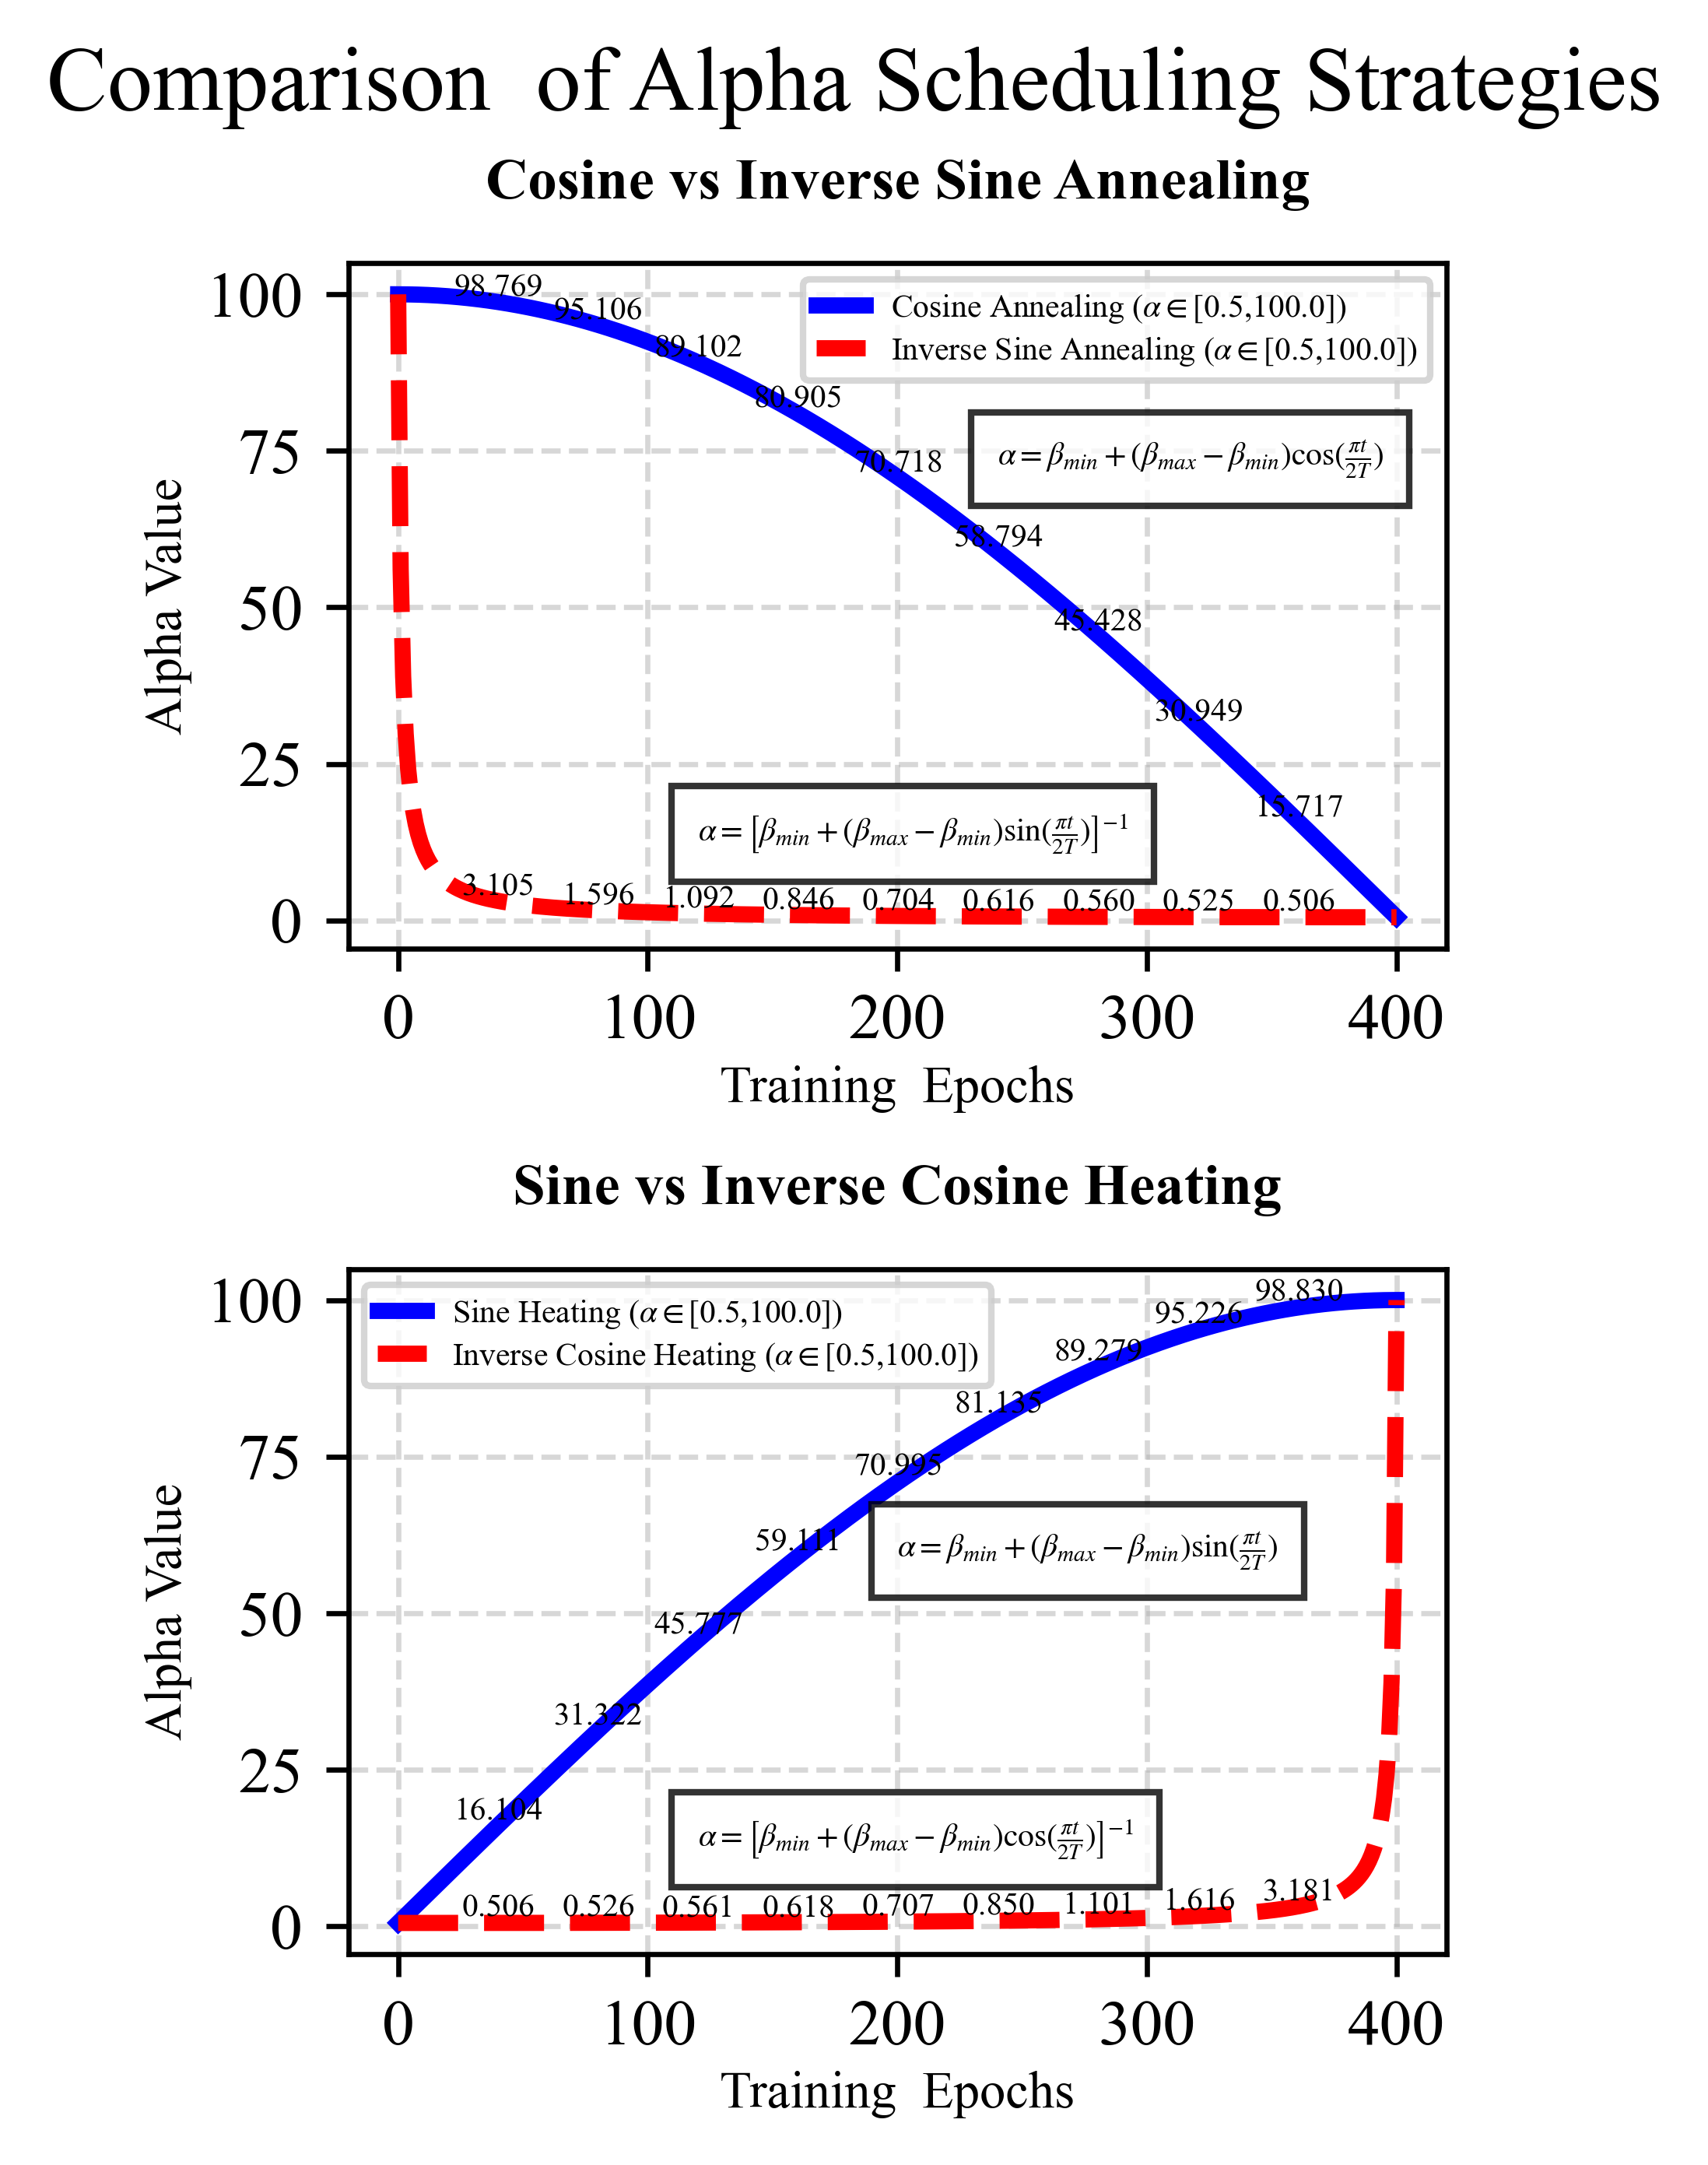

In [ ]:
# max_epochs = 400 
# min_beta, max_beta = 0.5, 100.0
# min_beta2, max_beta2 = 0.01, 2.0
# epochs = np.linspace(0,  max_epochs, 400) 

# alpha_cos = min_beta + (max_beta - min_beta) * np.cos(epochs/max_epochs  * np.pi/2) 
# alpha_csc = 1 / (min_beta2 + (max_beta2 - min_beta2) * np.sin(epochs/max_epochs  * np.pi/2))   # 逆调度 
# alpha_sin = min_beta + (max_beta - min_beta) * np.sin(epochs/max_epochs  * np.pi/2) 
# alpha_sec = 1 / (min_beta2 + (max_beta2 - min_beta2) * np.cos(epochs/max_epochs  * np.pi/2))   # 逆调度 

# fig, axs = plt.subplots(2,  1, figsize=(9/2.54, 12/2.54))
# plt.tight_layout(pad=3)   # 全局自适应调整（推荐优先尝试）
# ax1, ax2= axs.flatten()

# line_cos = ax1.plot(epochs,  alpha_cos, 'b-', linewidth=2.5, label=r'Cosine Annealing ($\alpha \in$' + f'[{min_beta},{max_beta}])')
# line_csc = ax1.plot(epochs,  alpha_csc, 'r--', linewidth=2.5, label=r'Inverse Sine Annealing ($\alpha \in$' + f'[{1/max_beta2:.1f},{1/min_beta2:.1f}])')
# line_sin = ax2.plot(epochs,  alpha_sin, 'b-', linewidth=2.5, label=r'Sine Heating ($\alpha \in$' + f'[{min_beta},{max_beta}])')
# line_sec = ax2.plot(epochs,  alpha_sec, 'r--', linewidth=2.5, label=r'Inverse Cosine Heating ($\alpha \in$' + f'[{1/max_beta2:.1f},{1/min_beta2:.1f}])')

# for ratio in [0.1, 0.2,0.3,0.4, 0.5,0.6,0.7,0.8, 0.9]:
#     idx = int(ratio * len(epochs))
#     ax1.annotate(f'{alpha_cos[idx]:.3f}',  (epochs[idx], alpha_cos[idx]), textcoords="offset points",xytext=(0,1), ha='center', fontsize=5)
#     ax1.annotate(f'{alpha_csc[idx]:.3f}',  (epochs[idx], alpha_csc[idx]), textcoords="offset points", xytext=(0,1), ha='center', fontsize=5)
#     ax2.annotate(f'{alpha_sin[idx]:.3f}',  (epochs[idx], alpha_sin[idx]), textcoords="offset points",xytext=(0,1), ha='center', fontsize=5)
#     ax2.annotate(f'{alpha_sec[idx]:.3f}',  (epochs[idx], alpha_sec[idx]), textcoords="offset points", xytext=(0,1), ha='center', fontsize=5)

# ax1.legend(loc='best',framealpha=0.8,handlelength=1.5,borderpad=0.4,labelspacing=0.3, fontsize=5)
# ax1.set_title('Cosine vs Inverse Sine Annealing', fontweight='bold', fontsize=9)
# ax1.set_xlabel('Training  Epochs', labelpad=2,fontsize=8)
# ax1.set_ylabel('Alpha Value', labelpad=2,fontsize=8)
# ax1.grid(True,  linestyle='--', alpha=0.5)

# ax2.legend(loc='best',framealpha=0.8,handlelength=1.5,borderpad=0.4,labelspacing=0.3, fontsize=5)
# ax2.set_title('Sine vs Inverse Cosine Heating', fontweight='bold', fontsize=9)
# ax2.set_xlabel('Training  Epochs', labelpad=2,fontsize=8)
# ax2.set_ylabel('Alpha Value', labelpad=2,fontsize=8)
# ax2.grid(True,  linestyle='--', alpha=0.5)

# x_pos1 = 0.6 * max_epochs
# x_pos2 = 0.3 * max_epochs
# y_pos_cos = alpha_cos[int(0.5 * len(alpha_cos))] + 2
# y_pos_csc = alpha_csc[int(0.5 * len(alpha_csc))] + 12 
# ax1.text(x_pos1,  y_pos_cos, r'$\alpha = \beta_{min} + (\beta_{max}-\beta_{min})\cos(\frac{\pi t}{2T})$',fontsize=5, bbox=dict(facecolor='white', alpha=0.8))
# ax1.text(x_pos2,  y_pos_csc, r'$\alpha = \left[\beta_{min} + (\beta_{max}-\beta_{min})\sin(\frac{\pi t}{2T})\right]^{-1}$', fontsize=5, bbox=dict(facecolor='white', alpha=0.8))

# x_pos3 = 0.5 * max_epochs
# y_pos_sin = alpha_sin[int(0.5 * len(alpha_sin))] - 12
# y_pos_sec = alpha_sec[int(0.5 * len(alpha_sec))] + 12
# ax2.text(x_pos3,  y_pos_sin, r'$\alpha = \beta_{min} + (\beta_{max}-\beta_{min})\sin(\frac{\pi t}{2T})$',fontsize=5, bbox=dict(facecolor='white', alpha=0.8))
# ax2.text(x_pos2,  y_pos_sec, r'$\alpha = \left[\beta_{min} + (\beta_{max}-\beta_{min})\cos(\frac{\pi t}{2T})\right]^{-1}$', fontsize=5, bbox=dict(facecolor='white', alpha=0.8))

# fig.suptitle("Comparison  of Alpha Scheduling Strategies", y=1, fontsize=14) 
# plt.show() 
# save_fig(fig, 'AlphaSch')

In [20]:
# # 在绘图前释放内存 
# import gc 
# gc.collect()   # 手动触发垃圾回收 
 
# # 使用轻量级后端 
# import matplotlib as mpl 
# mpl.use('TkAgg')   # 默认跨平台后端 
# # mpl.use('Agg')   # 无交互式界面后端 
# %matplotlib inline

# plt.close('all')   # 关闭所有图形 

In [23]:
print("当前后端:", matplotlib.get_backend())

当前后端: module://matplotlib_inline.backend_inline


In [ ]:
from IPython import get_ipython 
get_ipython().kernel.do_shutdown(restart=False, now =False)   # 安全关闭内核，触发清理 

{'status': 'ok', 'restart': False}

: 